In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



In [3]:
df=sns.load_dataset("planets")
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [4]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [5]:
df["orbital_period"].fillna(df["orbital_period"].mean(),inplace=True)
df["mass"].fillna(df["mass"].mean(),inplace=True)
df["distance"].fillna(df["distance"].mean(),inplace=True)



In [6]:
df.isnull().sum()

method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

In [7]:
x=df.drop(columns=["method","orbital_period"])


In [8]:
y=df["orbital_period"]


In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
x_train

,number,mass,distance,year
518,1,14.400000,31.260000,2002
355,1,6.100000,264.069282,2007
528,1,0.230000,43.120000,2002
445,1,1.880000,33.010000,2004
987,1,2.638161,116.140000,2010
...,...,...,...,...
87,1,2.638161,264.069282,2012
330,2,0.071670,37.840000,2008
466,2,0.150700,24.150000,2011
121,1,2.300000,20.030000,2013


In [29]:
lr=LinearRegression()
lr.fit(x_train,y_train)

y_pred=lr.predict(x_test)
r2_score(y_test,y_pred)

-2.7300446695243177

In [28]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100)

In [12]:
lr=LinearRegression()
np.mean(cross_val_score(lr,x,y,scoring="r2"))


-2.7792499297393842

C:\Users\subha\AppData\Local\Temp\ipykernel_20864\2779357734.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


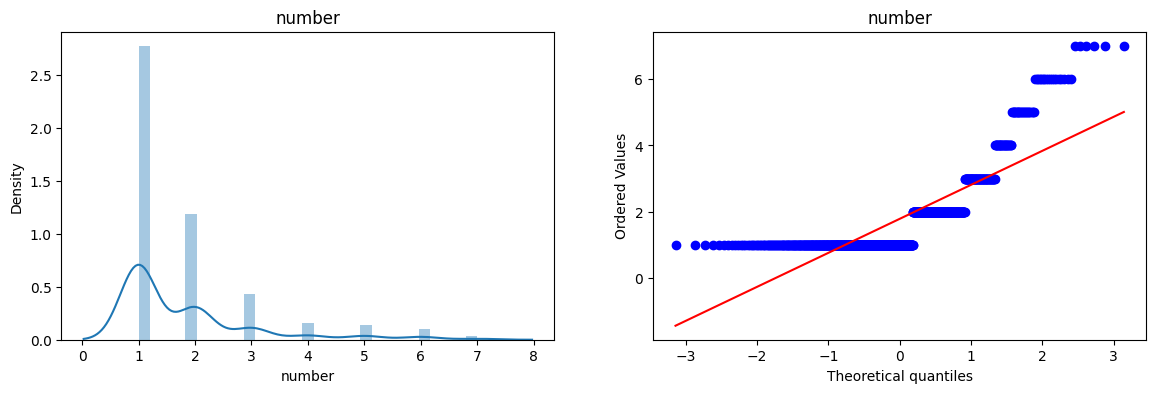

C:\Users\subha\AppData\Local\Temp\ipykernel_20864\2779357734.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


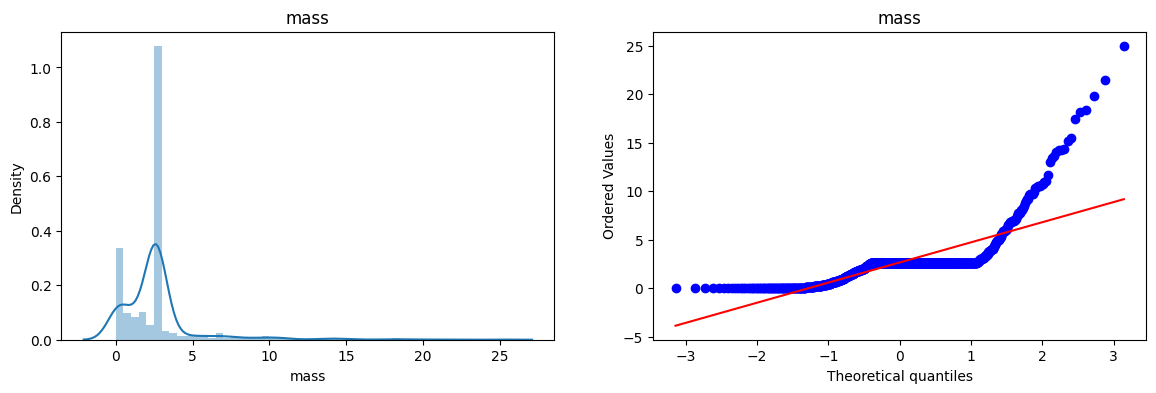

C:\Users\subha\AppData\Local\Temp\ipykernel_20864\2779357734.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


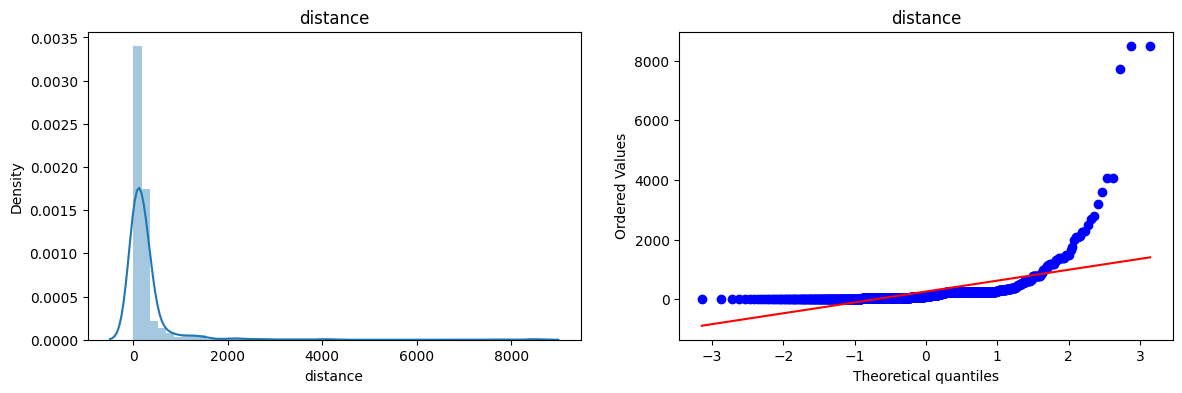

C:\Users\subha\AppData\Local\Temp\ipykernel_20864\2779357734.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


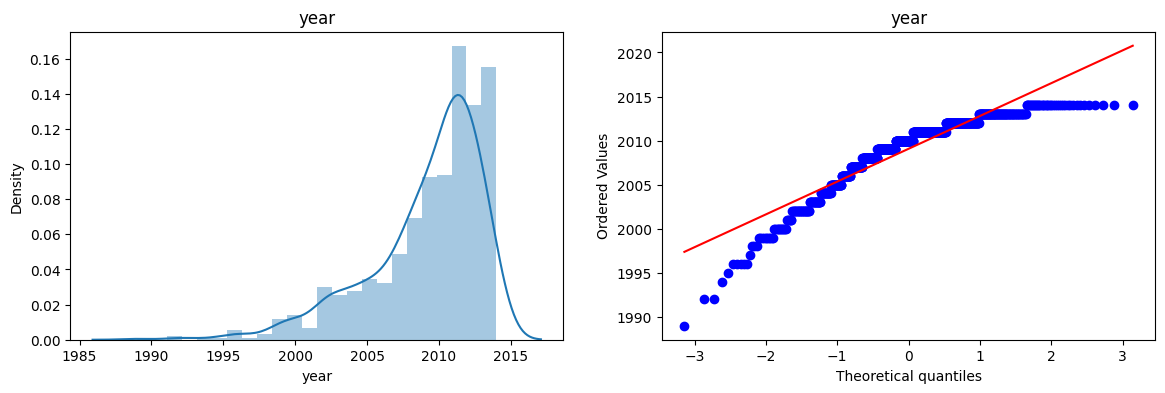

In [13]:
for col in x_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(x_train[col])
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(x_train[col],dist="norm",plot=plt)
    plt.title(col)
    
    plt.show()

In [14]:
pt_bc=PowerTransformer(method="box-cox")
x_train_bc=pt_bc.fit_transform(x_train+0.000001)
x_test_bc=pt_bc.transform(x_test+0.000001)

C:\Users\subha\anaconda3\lib\site-packages\scipy\stats\_morestats.py:922: RuntimeWarning: overflow encountered in power
  variance = np.var(data**lmb / lmb, axis=0)
C:\Users\subha\anaconda3\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\subha\anaconda3\lib\site-packages\numpy\core\_methods.py:247: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [15]:
lr=LinearRegression()
lr.fit(x_train_bc,y_train)

y_pred2=lr.predict(x_test_bc)
r2_score(y_test,y_pred2)

-4.207003183403029

In [16]:
pt_yj=PowerTransformer(method="yeo-johnson")
x_train_yj=pt_yj.fit_transform(x_train)
x_test_yj=pt_yj.transform(x_test)

C:\Users\subha\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3256: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
C:\Users\subha\anaconda3\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\subha\anaconda3\lib\site-packages\numpy\core\_methods.py:247: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [31]:
lr=LinearRegression()
lr.fit(x_train_yj,y_train)

y_pred3=lr.predict(x_test_yj)
r2_score(y_test,y_pred3)

-4.4386313387346314

In [18]:
df2=sns.load_dataset("planets")
df2.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [19]:
df2.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [20]:
df2["orbital_period"].fillna(df2["orbital_period"].mean(),inplace=True)
df2["mass"].fillna(df2["mass"].mean(),inplace=True)
df2["distance"].fillna(df2["distance"].mean(),inplace=True)


In [21]:
df2.isnull().sum()

method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64